adding import lib

In [111]:
import cv2
import numpy as np
import os
import glob
import mahotas as mt
import matplotlib.pyplot as plt
#from sklearn.svm import LinearSVC

define a extract haralick features function

In [112]:
def extract_haralick_features(image):
        features = mt.features.haralick(image)

        haralick_features_mean = features.mean(axis=0)
        return haralick_features_mean

define a extract Local binary patterns (LBP) function

In [113]:
def extract_LBP(image):
    feat = mt.features.lbp(image=image, points=(2*8), radius=2, ignore_zeros="True")
    feat = np.reshape(cv2.calcHist([np.float32(feat)], [0], None, [256], [0, 256]),(256))
    return feat

Divide the picture as grids (5x4) and calculate features

In [114]:
def features_of_grid(image):
    height = image.shape[0]
    width = image.shape[1]    

    x_step = int(width / 5)
    y_step = int(height / 4)

    x = 0
    y= 0
    
    all_features = []

    for i in range(5):
        if i < 4: 
            w = x_step 
        else:
            w = width - x
        for j in range(4):
            if j < 3: 
                h = y_step 
            else:
                h = height - y
            
            crop_img = image[y:y+h, x:x+w] 
            
            y += h
            if i == 0 and j == 0:
                all_features = extract_haralick_features(crop_img)
            elif i == 0 and j == 1:
                hfc = extract_haralick_features(crop_img)
                all_features = np.stack((all_features, hfc), axis=-1)
            else:
                hfc = []
                hfc.append(extract_haralick_features(crop_img))
                hfc = np.asarray(hfc)
                all_features = np.concatenate((all_features, hfc.T), axis=1)
        x += w
        y= 0
            
    return all_features
    

test

[[ 7.08718622e-04  9.39331365e-04  6.02374072e-04  2.78120669e-04
   5.86748251e-04  4.60009211e-04  4.47607686e-04  3.36519920e-04
   6.79106456e-04  6.24207110e-04  3.46298744e-04  3.01999378e-04
   5.40891996e-04  3.65543529e-04  5.33180549e-04  3.30700055e-04
   5.05253572e-04  7.79028458e-04  3.65537248e-04  3.18445392e-04]
 [ 1.35280061e+02  1.22410194e+02  1.39067135e+02  1.45191607e+02
   1.64015030e+02  1.69498376e+02  1.42620905e+02  1.35871380e+02
   1.52160190e+02  1.51546917e+02  1.36623808e+02  1.16992014e+02
   1.70013535e+02  1.38381099e+02  1.29546745e+02  1.09951404e+02
   1.67111438e+02  1.64955046e+02  1.21489592e+02  9.19529131e+01]
 [ 8.87793718e-01  8.70985255e-01  9.38732412e-01  9.56736193e-01
   8.90377296e-01  9.27731104e-01  9.39670961e-01  9.51357084e-01
   9.03887026e-01  9.06142287e-01  9.56206616e-01  9.63709888e-01
   9.05915555e-01  9.51602762e-01  9.47324141e-01  9.64321214e-01
   9.14248845e-01  8.77073518e-01  9.69513955e-01  9.78101531e-01]
 [ 6.03

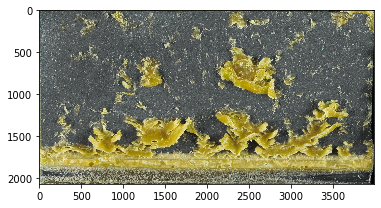

In [115]:
image = cv2.imread("../Klebeverbindungen_Daten/ProbeE2/2D/ProbeE2_1_makro_cut.png")
plt.imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

f = features_of_grid(gray)
print(f)


visualize calculated features

In [116]:
fig = plt.figure()

fig, axs = plt.subplots(3, 5)
langs = ["Angular Second Moment", "Contrast", "Correlation", "Sum of Squares: Variance", "Inverse Difference Moment", "Sum Average", 
        "Sum Variance", "Sum Entropy", "Entropy", "Difference Veriance", "Difference Entropy", "Info. Measure of Correlation 1", "Info. Measure of Correlation 2"]
y_axis = np.arange(13)
for i in range(13):
        x = int(i/5)
        y = int(i % 5)
        axs[x,y].scatter(f)


SyntaxError: invalid syntax (<ipython-input-116-e716b35eca46>, line 7)

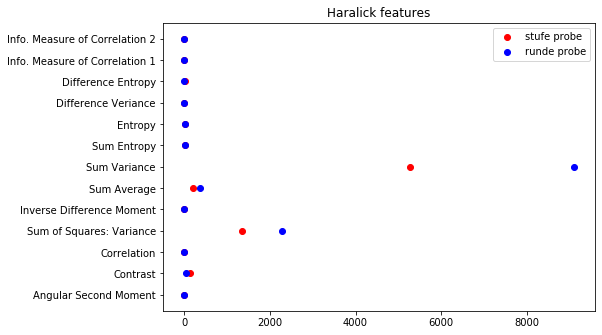

[ 3.84823027e-04  1.40207938e+02  9.48238937e-01  1.35448014e+03
  1.80335976e-01  2.09792993e+02  5.27771261e+03  8.02456777e+00
  1.23394744e+01  2.49424062e-04  4.42025514e+00 -2.50750970e-01
  9.84086178e-01]
[ 4.61401144e-02  4.59861540e+01  9.89936182e-01  2.28487136e+03
  4.59725882e-01  3.60778782e+02  9.09349927e+03  6.87454259e+00
  9.52430920e+00  6.56390718e-04  3.28731879e+00 -4.37346942e-01
  9.97411317e-01]


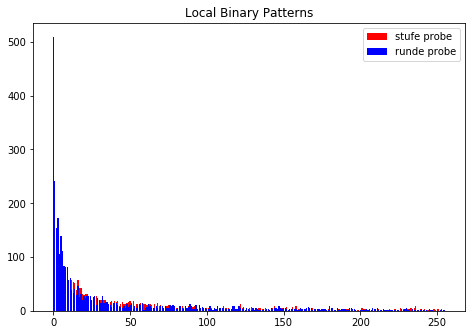

In [ ]:
image = cv2.imread("../Klebeverbindungen_Daten/ProbeE2/2D/ProbeE2_1_makro_cut.png")
image_r = cv2.imread("../Klebeverbindungen_Daten/ProbeR1/2D/ProbeR1_1_makro_cut.png")

# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_r = cv2.cvtColor(image_r, cv2.COLOR_BGR2GRAY)
# extract haralick texture from the image
hfeatures = extract_haralick_features(gray)
hfeatures_r = extract_haralick_features(gray_r)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ["Angular Second Moment", "Contrast", "Correlation", "Sum of Squares: Variance", "Inverse Difference Moment", "Sum Average", 
        "Sum Variance", "Sum Entropy", "Entropy", "Difference Veriance", "Difference Entropy", "Info. Measure of Correlation 1", "Info. Measure of Correlation 2"]
ax.set_title("Haralick features")
ax.scatter( hfeatures, langs, color="r" )
ax.scatter(hfeatures_r, langs, color = "b")
ax.legend(["stufe probe", "runde probe"])
plt.show()

print(hfeatures)
print(hfeatures_r)

lfeatures = extract_LBP(gray)
lfeatures_r = extract_LBP(gray_r)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = np.arange(256)
ax.set_title("Local Binary Patterns")
ax.bar(langs,lfeatures, color ="r")
ax.bar(langs,lfeatures_r, color ="b")
ax.legend(["stufe probe", "runde probe"])
plt.show()
#print(lfeatures)